<div align=center>
		
<p></p>
<p></p>
<font size=5>
به نام خدا
<font/>
<p></p>
<p></p>
<font color=green size=4>
بازیابی پیشرفته اطلاعات - تمرین سوم
<br/>
بوستان و گلستان سعدی
</font>
<br/>
<br/>
<font size=3>
بهار 1401
<br/>
<font/>
<br/>


</div>

<hr/>
<div align=center>
		    <font size=3>
			    <br />
				گروه 33:
				علی مهربانی ، آرمان سلیمانی ، پانیذ حلواچی
            	<br/>
			</font>
    <br/>
    </div>

In [2]:
#import necessary libraries
!pip install hazm
!pip install sentence_transformers
from sentence_transformers import SentenceTransformer
from __future__ import unicode_literals
from hazm import *
import json
from random import randint
from nltk import FreqDist
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
import codecs
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import spatial
from gensim.models import FastText
from sklearn.metrics.pairwise import cosine_similarity

You should consider upgrading via the 'C:\Users\arman\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'C:\Users\arman\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


C:\Users\arman\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<div align=center>
		    <font size=4 color=green>
			    <br />
                بخش اول:
                </font>
                <font size=3>
                دریافت داده‌ها
            	<br/>
			</font>
    <br/>
    </div>
    <hr/>

In [3]:
all_files = listdir('Boostan/')

i = 0
df = pd.DataFrame(columns=[0])

for p in all_files:
    f = open('Boostan/' + p, 'r', encoding='utf8')
    
    has_poems = True
    
    
    while has_poems:
        poem = ''
        
        while True:
            s = f.readline()
            if '$' in s:
                has_poems = False
                break
            elif '_' in s:
                break
            poem = poem + s
        
        #inja ye poem kamel shode
        if poem != '':
            df.loc[i] = poem
            i = i + 1

In [4]:
df.size

224

<div align=center>
		    <font size=4 color=green>
			    <br />
                بخش دوم:
                </font>
                <font size=3>
                پیش پردازش اولیه متن
            	<br/>
			</font>
    <br/>
    </div>
    <hr/>

In [5]:
#copy df
poems = df.copy()
print(df.at[223, 0])

چنین یاد دارم که سقای نیل
نکرد آب بر مصر سالی سبیل
گروهی سوی کوهساران شدند
به فریاد خواهان باران شدند
گرستند و از گریه جویی روان
نیامد مگر گریهٔ آسمان
به ذوالنون خبر برد از ایشان کسی
که بر خلق رنج است و زحمت بسی
فرو ماندگان را دعایی بکن
که مقبول را رد نباشد سخن
شنیدم که ذوالنون به مدین گریخت
بسی بر نیامد که باران بریخت
خبر شد به مدین پس از روز بیست
که ابر سیه دل بر ایشان گریست
سبک عزم باز آمدن کرد پیر
که پر شد به سیل بهاران غدیر
بپرسید از او عارفی در نهفت
چه حکمت در این رفتنت بود؟ گفت
شنیدم که بر مرغ و مور و ددان
شود تنگ روزی به فعل بدان
در این کشور اندیشه کردم بسی
پریشان‌تر از خود ندیدم کسی
برفتم مبادا که از شر من
ببندد در خیر بر انجمن
بهی بایدت لطف کن کان بهان
ندیدندی از خود بتر در جهان
تو آنگه شوی پیش مردم عزیز
که مر خویشتن را نگیری به چیز
بزرگی که خود را به خردی شمرد
به دنیا و عقبی بزرگی ببرد
از این خاکدان بنده‌ای پاک شد
که در پای کمتر کسی خاک شد
الا ای که بر خاک ما بگذری
به خاک عزیزان که یاد آوری
که گر خاک شد سعدی، او را چه غم؟
که در زندگی خاک بوده‌ست هم
به بیچارگی تن فرا خاک داد


<div align="right" dir="rtl">
    <h3>پیش‌پردازش اولیه</h3>
    در این مرحله از پیش‌پردازش، ابتدا واژگانی مانند «مر» حذف می‌شود و مواردی مانند «گه» در انتهای واژگان یا «ز» حذف می‌شوند.
    <br>
    همچنین افعالی که حالت ماضی باستانی داشته باشند به حالت عادی بازگردانده می‌شوند که اشعار ما یکپارچه باشند و عملکرد مدل‌ها بهتر شود.
</div>

In [6]:
normalizer = Normalizer()
lemmatizer = Lemmatizer()

for i in range(0, df.shape[0]):
    df.at[i, 0] = normalizer.normalize(df.at[i, 0]).replace(' ز ', ' از ').replace(' مر ', ' ') #normalize beshe va z beshe az
    
    words = word_tokenize(df.at[i, 0])
    
    for j in range(0, len(words)):
        
        word = words[j]
        past_root = lemmatizer.lemmatize(word).split('#', 1)[0]
        past_root = past_root.replace('آ', 'ا')
        word_modified = word.replace(past_root, '')
        
        if word_modified != '':
            if word_modified[0] == 'ب' and len(word_modified) < 4:
                #yani fele maazi bode be forme ghadimi
                df.at[i, 0] = df.at[i, 0].replace(word, word[1:])
        
        if word.endswith('گه'):
            df.at[i, 0] = df.at[i, 0].replace(word, word[:-2]+'گاه')

<div align="right" dir="rtl">
    <h3>ادامه‌ی پیش‌پردازش</h3>
    در این قسمت افعال ماضی که بجای «ن» با «م» شروع می‌شوند، اصلاح می‌شوند که یکپارچگی اشعار حفظ شود.
    <br>
    در ادامه نیز استاپ‌وورد ها حذف می‌شوند و لمتایز کردن متن انجام می‌شود. همچنین یک دیکشنری از افعالی که هضم ندارد اضافه کرده‌ایم تا هنگام لمتایز کردن، این افعال دچار مشکل نشوند.
</div>

In [7]:
for i in range(0, df.shape[0]):
    
    words = word_tokenize(df.at[i, 0])
    
    for j in range(0, len(words)):
        
        word = words[j]
        
        if word[0] == 'م':
            word_modified = 'ب' + word[1:]
            present_root = lemmatizer.lemmatize(word_modified).split('#', 1)[-1]
            present_root = present_root.replace('آ', 'ا')
            word_modified = word_modified.replace(present_root, '')
            
            if word_modified == 'ب':
                
                df.at[i, 0] = df.at[i, 0].replace(word, 'ن'+word[1:])

In [8]:
with open('Exception.txt', encoding='utf8') as exc:
    data = exc.read()
special_verbs = json.loads(data)


df_temp = pd.DataFrame(columns=[0])
stopwords = ['!','،','؟','ز','ار']+[normalizer.normalize(x.strip()) for x in codecs.open('stopwords.txt','r','utf-8').readlines()]

for i in range(0, df.shape[0]):
    
    words = word_tokenize(df.at[i, 0])
    words = [t for t in words if t not in stopwords]
    lemmatized_tokens = []
    
    for t in words:
        if t in special_verbs.keys():
            lemmatized_tokens.append(t)
        else:
            lemmatized_tokens.append(lemmatizer.lemmatize(t).split('#')[0])
    
    lemmatized = ' '.join(lemmatized_tokens)
            
    df.at[i, 0] = lemmatized
    df_temp.at[i, 0] = lemmatized_tokens



In [9]:
print(df_temp.at[0, 0])

['شنید', 'وقت', 'نزع', 'روان', 'هرمز', 'نوشیروان', 'خاطر', 'نگهدار', 'درویش', 'باش', 'بند', 'آسایش', 'باش', 'نیاساید', 'اندر', 'دیار', 'کس', 'چو', 'آسایش', 'جو', 'بس', 'آمد', 'دانا', 'پسند', 'شبان', 'خفته', 'گرگ', 'گوسفند', 'برو', 'پاس', 'درویش', 'محتاج', 'شاه', 'رعیت', 'تاجدار', 'رعیت', 'چو', 'بیخند', 'سلطان', 'درخت', 'درخت', 'ای', 'پسر', 'بیخ', 'سخت', 'کرد', 'توانی', 'دل', 'خلق', 'ریش', 'وگر', 'کرد', 'کرد', 'بیخ', 'جاده', 'باید', 'مستقیم', 'ره', 'پارسا', 'امید', 'بیم', 'طبیعت', 'مرد', 'بخردی', 'امید', 'نیک', 'بیم', 'بدی', 'گر', 'پادشه', 'یافت', 'اقلیم', 'ملک', 'پنه', 'یافت', 'بخشایش', 'آرد', 'امیدوار', 'امید', 'بخشایش', 'کردگار', 'گزند', 'کسانش', 'آمد', 'پسند', 'ترسید', 'ملک', 'آمد', 'گزند', 'وگر', 'سرشت', 'خو', 'کشور', 'آسودگی', 'بو', 'پای', 'رضا', 'گیر', 'وگر', 'سوار', 'سر', 'گیر', 'فراخ', 'مرز', 'کشور', 'خواست', 'دلتنگ', 'بینی', 'رعیت', 'شاه', 'مستکبر', 'دلاور', 'ترسید', 'کاو', 'ترسید', 'داور', 'ترسید', 'دگر', 'کشور', 'آباد', 'دید', 'خواب', 'دل', 'اهل', 'کشور', 'خراب', 'خراب', 'بد

<div align=center>
		    <font size=4 color=green>
			    <br />
                بخش سوم:
                </font>
                <font size=3>
                پیشنهاد شعر
            	<br/>
			</font>
    <br/>
    </div>
    <hr/>

In [10]:
#helper functions
#return index of 10 largest elements
def ten_largest_elements(list1,k):
  templist = list1.copy()
  index_list = []
  for i in range(k):
    index, largest_values = largest_element_index(templist)
    index_list.append(index)
    templist[index] = 0
  return index_list

#return the largest element
def largest_element_index(temp_list):
  largest_value = 0
  index = 0
  for i,element in enumerate(temp_list):
    if element>largest_value:
      largest_value = element
      index = i
  return (index,largest_value)

#print poems with mentioned indices
def print_poems(list_of_indices):
  for i, index in enumerate(list_of_indices):
    print("rank ",i+1,":")
    print(poems.at[index,0],"\n")

<div dir="rtl">
		    <font size=2>
			      1- استفاده از روش boolean
			</font>
    <br/>
    </div>

In [11]:
documents = list(itertools.chain(*df.values))
number_of_documents = len(documents)

In [12]:
vectorizer = CountVectorizer()
vectorizer.fit(documents)
vocabulary = vectorizer.vocabulary_
#unique words
terms = list(vocabulary.keys())

In [13]:
#return boolean vector representation 
def bool_Representation(documents):
  matrix = []
  for document in documents:
    dummy_list = []
    for j in terms:
      if j in document:
        dummy_list.append(1)
      else:
        dummy_list.append(0)
    matrix.append(dummy_list)
  return matrix

#return jaccard similarity between two sets
def jaccard_similarity(A, B):
    nominator = A.intersection(B)
    denominator = A.union(B)
    similarity = len(nominator)/len(denominator)
    return similarity

#return number of similar elements between query and each document
def prediction(query_vector,matrix):
    scores = []
    count = 0
    term_len = len(terms)
    for i, vector in enumerate(matrix):
      #we can change to sum of the query_vector and vector)
        for t in range(term_len):
            if(query_vector[t] == vector[t]):
                count += 1
        scores.append(count)
        count = 0
    return scores

In [14]:
matrix_temp = bool_Representation(documents)
def boolean_method(input):
  # desired query [does not need a tokenization]
  query = bool_Representation([input])[0]
  ###########
  scores = prediction(query,matrix_temp)
  return scores

<div dir="rtl">
		    <font size=2>
			      2- استفاده از tf-idf
			</font>
    <br/>
    </div>

In [15]:
tfidf_vectorizer = TfidfVectorizer()

def tf_idf_method(input):
  documents = list(itertools.chain(*df.values))
  number_of_documents = len(documents)
  # fit each time 
  tfidf_vectorizer.fit(documents)
  tfidf_matrix = tfidf_vectorizer.transform(documents).todense().tolist()
  #desired query [does not need tokenization]
  query = [input]
  #################
  query_vector = tfidf_vectorizer.transform(query).todense().tolist()[0]
  #calculate similarity
  similarities = []
  for tf_idf_vector in tfidf_matrix:
    similarity = 1 - spatial.distance.cosine(query_vector,tf_idf_vector)
    similarities.append(similarity)
  return similarities

<div dir="rtl">
		    <font size=2>
			      3- استفاده از روش fasttext
			</font>
    <br/>
    </div>

In [16]:
#set hyperparameters
embedding_size = 60
window_size = 40
min_word = 5
down_sampling = 1e-2
word_tokenized_corpus = list(itertools.chain(*df_temp.values))
word_tokenizad_temp = word_tokenized_corpus.copy()

In [18]:
# define model and train it
model = FastText(vector_size=embedding_size, window=window_size, min_count=min_word, sample=down_sampling)
model.build_vocab(word_tokenized_corpus)
model.train(word_tokenized_corpus, total_examples=len(word_tokenized_corpus), epochs=100)

(2239662, 2857800)

In [19]:
#calculate mean vector for each poem
poem_vectors=[[]] * len(word_tokenizad_temp)
for i,poem in enumerate(word_tokenizad_temp):
  poem_vectors[i] = [0 for i in range(embedding_size)]
  length = len(poem)
  for word in poem:
    try:
        temp = model.wv[word]
        vector = poem_vectors[i]
        poem_vectors[i] = [vector[j]+temp[j] for j in range(embedding_size)]
        break
    except:
        length -= 1
  poem_vectors[i] = [item / length for item in poem_vectors[i]]

In [20]:
def fasttext_method(input):
  # desired query [tokenization is needed]
  query = input
  tokenized_query = word_tokenize(query)
  ##############
  query_vector = [0 for i in range(embedding_size)]
  length = len(tokenized_query)
  #calculate mean of query's words vectors
  for word1 in tokenized_query:
    try:
          temp1 = model.wv[word1]
          query_vector = [query_vector[j]+temp1[j] for j in range(embedding_size)]
          break
    except:
          length -= 1
  query_vector = [item / length for item in query_vector]
  #calculate cosine similarity
  similarities = []
  for poem_vector in poem_vectors:
    similarity = 1 - spatial.distance.cosine(query_vector,poem_vector)
    similarities.append(similarity)
  return similarities

<div dir="rtl">
		    <font size=2>
			      4- استفاده از روش bert
			</font>
    <br/>
    </div>

In [21]:
model_bert = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading: 100%|██████████| 190/190 [00:00<00:00, 190kB/s]
Downloading: 100%|██████████| 3.95k/3.95k [00:00<00:00, 999kB/s]
Downloading: 100%|██████████| 2.00/2.00 [00:00<00:00, 2.01kB/s]
Downloading: 100%|██████████| 229/229 [00:00<00:00, 115kB/s]
Downloading: 100%|██████████| 438M/438M [07:49<00:00, 933kB/s]  
Downloading: 100%|██████████| 53.0/53.0 [00:00<00:00, 10.7kB/s]
Downloading: 100%|██████████| 112/112 [00:00<00:00, 22.5kB/s]
Downloading: 100%|██████████| 466k/466k [00:01<00:00, 243kB/s]  
Downloading: 100%|██████████| 399/399 [00:00<00:00, 80.0kB/s]
Downloading: 100%|██████████| 232k/232k [00:00<00:00, 241kB/s]  


In [20]:
def bert_method(input):
  documents1 = list(itertools.chain(*df.values))
  number_of_documents1 = len(documents1)
  # desired query [tokenization is not needed]
  query = input
  ###########
  documents1.append(query)
  sentence_embeddings = model_bert.encode(documents1)
  similarities = list(itertools.chain(*cosine_similarity(
    [sentence_embeddings[-1]],
    sentence_embeddings[0:number_of_documents1]
    )))
  return similarities

<div align=center>
		    <font size=4 color=green>
			    <br />
                بخش نهایی:
                </font>
                <font size=3>
                پیشنهاد شعر براساس ورودی داده شده
            	<br/>
			</font>
    <br/>
    </div>
    <hr/>

In [29]:
input_string = input()
method = input("Enter your desired method: ")
k = int(input("Enter number of similar poems: "))
if method == "bert":
  print_poems(ten_largest_elements(bert_method(input_string),k))
elif method == "boolean":
  print_poems(ten_largest_elements(boolean_method(input_string),k))
elif method == "tf_idf":
  print_poems(ten_largest_elements(tf_idf_method(input_string),k))
else:
  print_poems(ten_largest_elements(fasttext_method(input_string),k))

شنیدم که در وقت نزع روان به هرمز چنین گفت نوشیروان که خاطر نگهدار درویش باش نه در بند آسایش خویش باش نیاساید اندر دیار تو کس چو آسایش خویش جویی و بس نیاید به نزدیک دانا پسند شبان خفته و گرگ در گوسفند برو پاس درویش محتاج دار که شاه از رعیت بود تاجدار رعیت چو بیخند و سلطان درخت درخت، ای پسر، باشد از بیخ سخت مکن تا توانی دل خلق ریش وگر می‌کنی می‌کنی بیخ خویش اگر جاده‌ای بایدت مستقیم ره پارسایان امید است و بیم طبیعت شود مرد را بخردی به امید نیکی و بیم بدی گر این هر دو در پادشه یافتی در اقلیم و ملکش پنه یافتی که بخشایش آرد بر امیدوار به امید بخشایش کردگار گزند کسانش نیاید پسند که ترسد که در ملکش آید گزند وگر در سرشت وی این خوی نیست در آن کشور آسودگی بوی نیست اگر پای بندی رضا پیش گیر وگر یک سواری سر خویش گیر فراخی در آن مرز و کشور مخواه که دلتنگ بینی رعیت ز شاه ز مستکبران دلاور بترس از آن کاو نترسد ز داور بترس دگر کشور آباد بیند به خواب که دارد دل اهل کشور خراب خرابی و بدنامی آید ز جور رسد پیش بین این سخن را به غور رعیت نشاید به بیداد کشت که مر سلطنت را پناهند و پشت مراعات دهقان کن از بهر خو

<div align=center>
		    <font size=4 color=green>
                نتایج و تحلیل:
    </font>
</div>
        <hr/>



   <h3>MRR:</h3>
    Boolean: 0.70<br>
    TF-IDF: 0.81<br>
    FASTTEXT: 0.56<br>
    BERT: 0.63<br>
<div align="right" dir="rtl">
    
  <br>
  همانطور که مشاهده می‌شود، بر خلاف آنچه انتظار می‌رفت، روش‌های tf-idf
    و boolean
     عملکرد بهتری داشته‌اند که دلیل آن نوع داده‌های استفاده شده است: اگر در اشعار سعدی، که عمدتا سبک و سیاق مشابهی دارند، سعی کنیم بر اساس کانتکست مشابهت پیدا کنیم، نتیجه خیلی مناسب نخواهد بود و بسیاری از اشعار از دید چنین مدل‌هایی مشابه هستند. حتی چنانچه انسان بخواهد مشابهت اشعار را بسنجد با دشواری مواجه خواهد شد زیرا بخاطر ویژگی سهل ممتنع بودن اشعار سعدی، از لحاظ جمله‌بندی، تنوع بالایی نداریم، ولی مفاهیم متنوعی در پس واژگان این اشعار نهفته است که به سادگی قابل درک نیست. بنابراین اگر بر اساس شباهت کلمات و بدون در نظر گرفتن مفهوم جلو برویم، احتمالا شانس بهتری در سنجش مشابهت خواهیم داشت.
</div>

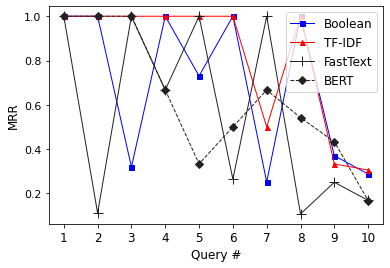

In [25]:
boolean = [1, 1, 0.319, 1, 0.73, 1, 0.251, 1, 0.37, 0.287]
tfidf = [1, 1, 1, 1, 1, 1, 0.5, 1, 0.333, 0.305]
fasttext = [1, 0.111, 1, 0.667, 1, 0.264, 1, 0.107, 0.25, 0.168]
bert = [1, 1, 1, 0.667, 0.333, 0.5, 0.667, 0.542, 0.433, 0.167]

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

plt.plot(x, boolean, label = 'Boolean',  marker='s', ms=5, linewidth=1, color='b') # square
plt.plot(x, tfidf, label = 'TF-IDF',  marker='^', ms=5, linewidth=1, color='r') # triangle
plt.plot(x, fasttext, label = 'FastText',  marker='+', ms=10, linewidth=1, color='#222222') # circle
plt.plot(x, bert, label = 'BERT',  marker='D', ms=5, linewidth=1, color='#222222', linestyle='dashed') # diamond

plt.ylabel('MRR',fontsize=12)

plt.xlabel('Query #',fontsize=12)
plt.yticks(fontsize=11)

plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], fontsize=12)
plt.legend(fontsize=12, loc='upper right')
plt.show()